## Imports

- ANN.ipynb contains the ANN class
- preprocess.ipynb contains helper functions to preprocess data
- utils.ipynb contains global variabes and other helper functions

In [1]:
## imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import glob

%run ANN.ipynb
%run preprocess.ipynb
%run utils.ipynb

We define our preprocessing class and set a random seed to ensure reproducability.

In [2]:
p = Preprocess(is_neural=True)

seed = 7
np.random.seed(seed)

## Load MNIST data

In [3]:
train_file = "mnist_train.csv"
test_file = "mnist_test.csv"

In [4]:
train_data_file = open(train_file, 'r')
train_data_list = train_data_file.readlines() 
train_data_file.close() 
print("train set size: ", len(train_data_list))

test_data_file = open(test_file, 'r') 
test_data_list = test_data_file.readlines()
test_data_file.close()
print("test set size: ", len(test_data_list))

train set size:  60000
test set size:  10000


We minimize the MNIST train set size to 1500 samples in order to speed up the training process.

In [5]:
mini_training_data = p.generate_mini_data(train_data_list, 1500)
#mini_testing_data = p.generate_mini_data(test_data_list, 500)

X_train, y_train = p.preprocess_data(mini_training_data)
X_test, y_test = p.preprocess_data(test_data_list)

print(len(X_train))
print(len(X_test))

1500
10000


## Training the model

We use the hyperparameter values provided by utils.ipynb

In [6]:
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, batch_size, epochs)
n.train(X_train, y_train)

Training epoch#:  0
errors (SSE):  [535.80374548]
Training epoch#:  1
errors (SSE):  [205.72002754]
Training epoch#:  2
errors (SSE):  [115.48252849]
Training epoch#:  3
errors (SSE):  [64.07616103]
Training epoch#:  4
errors (SSE):  [38.17151961]
Training epoch#:  5
errors (SSE):  [24.65231101]
Training epoch#:  6
errors (SSE):  [16.76377641]
Training epoch#:  7
errors (SSE):  [12.10412825]
Training epoch#:  8
errors (SSE):  [9.14612284]
Training epoch#:  9
errors (SSE):  [7.28841553]


## Model accuracy on test data

In [7]:
n.test(X_test, y_test)
accuracy = n.evaluate(n.results)

print("Test set accuracy % = ", accuracy)

Test set accuracy % =  92.65


## ANN Model accuracy on different hyper-parameters

We define a function to store the accuracies of multiple ANN models.

In [8]:
def get_model_results(models):
    history = []
    for model in models:
        correct = 0
        model.test(X_test, y_test)
        for result in model.results:
            if result[0] == result[1]:
                correct += 1
        correct = 100 * (correct / len(model.results))
        history.append(correct)
    return history

Here we define a function providing the option to test model performance on multiple learning rates, batch sizes and epochs.

In [9]:
def get_param_results(param, values):
    model_list = []
    
    for v in values:
        if param == 'lr':
            n = NeuralNetwork(learningrate=v)
            print("\nTraining with learning rate: ", v)
            n.train(X_train, y_train)
            model_list.append(n)
        elif param == 'bs':
            n = NeuralNetwork(batch_size=v)
            print("\nTraining with batch size: ", v)
            n.train(X_train, y_train)
            model_list.append(n)
        elif param == 'ep':
            n = NeuralNetwork(epochs=v)
            print("\nTraining with epoch: ", v)
            n.train(X_train, y_train)
            model_list.append(n)
            
    model_results = get_model_results(model_list)
    
    return {
        "results": model_results,
        "values": values
    }

## Assess model accuracy against different hyperparameters

In [10]:
lr_results = get_param_results('lr', [0.01, 0.03, 0.1, 0.3, 0.6])
learning_rates = lr_results['values']
lr_acc = lr_results['results']

bs_results = get_param_results('bs', [1, 20, 100, 200, 500, len(mini_training_data)])
batch_sizes = bs_results['values']
bs_acc = bs_results['results']

epoch_results = get_param_results('ep', [10,25,50,80,100])
epochs = epoch_results['values']
epochs_acc = epoch_results['results']


Training with learning rate:  0.01
Training epoch#:  0
errors (SSE):  [779.62830015]
Training epoch#:  1
errors (SSE):  [449.50784313]
Training epoch#:  2
errors (SSE):  [380.78730926]
Training epoch#:  3
errors (SSE):  [342.57901248]
Training epoch#:  4
errors (SSE):  [316.32902756]
Training epoch#:  5
errors (SSE):  [296.2947545]
Training epoch#:  6
errors (SSE):  [280.01835069]
Training epoch#:  7
errors (SSE):  [266.25228078]
Training epoch#:  8
errors (SSE):  [254.28562663]
Training epoch#:  9
errors (SSE):  [243.67635139]

Training with learning rate:  0.03
Training epoch#:  0
errors (SSE):  [586.63437838]
Training epoch#:  1
errors (SSE):  [341.28519211]
Training epoch#:  2
errors (SSE):  [282.13011708]
Training epoch#:  3
errors (SSE):  [244.87541625]
Training epoch#:  4
errors (SSE):  [216.85612546]
Training epoch#:  5
errors (SSE):  [194.10431981]
Training epoch#:  6
errors (SSE):  [174.90109556]
Training epoch#:  7
errors (SSE):  [158.41432784]
Training epoch#:  8
errors (S

errors (SSE):  [21.37059183]
Training epoch#:  12
errors (SSE):  [18.2260409]
Training epoch#:  13
errors (SSE):  [15.63424439]
Training epoch#:  14
errors (SSE):  [13.51120434]
Training epoch#:  15
errors (SSE):  [11.8376692]
Training epoch#:  16
errors (SSE):  [10.49504196]
Training epoch#:  17
errors (SSE):  [9.3991406]
Training epoch#:  18
errors (SSE):  [8.49164368]
Training epoch#:  19
errors (SSE):  [7.73039018]
Training epoch#:  20
errors (SSE):  [7.08466896]
Training epoch#:  21
errors (SSE):  [6.53178944]
Training epoch#:  22
errors (SSE):  [6.05448055]
Training epoch#:  23
errors (SSE):  [5.63913678]
Training epoch#:  24
errors (SSE):  [5.27483113]
Training epoch#:  25
errors (SSE):  [4.95279465]
Training epoch#:  26
errors (SSE):  [4.6659937]
Training epoch#:  27
errors (SSE):  [4.40884746]
Training epoch#:  28
errors (SSE):  [4.17705956]
Training epoch#:  29
errors (SSE):  [3.96718338]
Training epoch#:  30
errors (SSE):  [3.77623455]
Training epoch#:  31
errors (SSE):  [3.

errors (SSE):  [1.88300449]
Training epoch#:  49
errors (SSE):  [1.83246229]
Training epoch#:  50
errors (SSE):  [1.78449548]
Training epoch#:  51
errors (SSE):  [1.73893067]
Training epoch#:  52
errors (SSE):  [1.69561743]
Training epoch#:  53
errors (SSE):  [1.65442243]
Training epoch#:  54
errors (SSE):  [1.61522459]
Training epoch#:  55
errors (SSE):  [1.57791168]
Training epoch#:  56
errors (SSE):  [1.54237847]
Training epoch#:  57
errors (SSE):  [1.50852582]
Training epoch#:  58
errors (SSE):  [1.47626028]
Training epoch#:  59
errors (SSE):  [1.4454935]
Training epoch#:  60
errors (SSE):  [1.41614147]
Training epoch#:  61
errors (SSE):  [1.38812369]
Training epoch#:  62
errors (SSE):  [1.36136272]
Training epoch#:  63
errors (SSE):  [1.33578403]
Training epoch#:  64
errors (SSE):  [1.31131589]
Training epoch#:  65
errors (SSE):  [1.28788881]
Training epoch#:  66
errors (SSE):  [1.26543393]
Training epoch#:  67
errors (SSE):  [1.2438798]
Training epoch#:  68
errors (SSE):  [1.2231

## Assess model performance on varying batch sizes and hidden nodes

In [11]:
mini_training_data = np.random.choice(train_data_list, 1500, replace = False)
print("Percentage of training data used:", (len(mini_training_data)/len(train_data_list)) * 100)

print("This will take a few moments ...")
n_list = []
bs_sizes = [1, 20, 100, 200, 500, len(mini_training_data)]
hidden_nodes = [200, 5] # lets try two different configurations of hidden node layer

# lets create the set of modesl
for hidden in hidden_nodes:
    n_list_element = [] # first set of nets with a given hidden node size
    
    for batch in bs_sizes:
        n = NeuralNetwork(batch_size=batch, hiddennodes=hidden)
        X_train, y_train = p.preprocess_data(mini_training_data)
        n.train(X_train, y_train)
        n_list_element.append(n)
        pass
    
    n_list.append(n_list_element)# now append the set of models 
    pass

#lets test the models 
#iterate through each model and accumilate number of correct predictions
model_results = []
model_result_element = []

for model1 in n_list:
    model_result_element = []
    
    for model2 in model1:
        correct = 0
        model2.test(X_test, y_test)
        
        for result in model2.results:
           
            if (result[0] == result[1]): 
                correct +=1
            pass
        correct = 100 * (correct / len(model2.results))
        model_result_element.append(correct)
        print(correct)
        pass
    pass
    model_results.append(model_result_element)
    pass


Percentage of training data used: 2.5
This will take a few moments ...
Training epoch#:  0
errors (SSE):  [513.90019252]
Training epoch#:  1
errors (SSE):  [244.77280779]
Training epoch#:  2
errors (SSE):  [178.28428557]
Training epoch#:  3
errors (SSE):  [135.22701814]
Training epoch#:  4
errors (SSE):  [104.2637255]
Training epoch#:  5
errors (SSE):  [80.83735895]
Training epoch#:  6
errors (SSE):  [62.84069991]
Training epoch#:  7
errors (SSE):  [49.05467678]
Training epoch#:  8
errors (SSE):  [38.81808957]
Training epoch#:  9
errors (SSE):  [31.26678894]
Training epoch#:  0
errors (SSE):  [882.85417966]
Training epoch#:  1
errors (SSE):  [486.22104167]
Training epoch#:  2
errors (SSE):  [407.99914175]
Training epoch#:  3
errors (SSE):  [365.86773581]
Training epoch#:  4
errors (SSE):  [337.81864418]
Training epoch#:  5
errors (SSE):  [317.21607888]
Training epoch#:  6
errors (SSE):  [301.17592045]
Training epoch#:  7
errors (SSE):  [288.14542108]
Training epoch#:  8
errors (SSE):  

## Visualize results

[91.18, 87.76, 85.15, 82.84, 74.05000000000001, 54.900000000000006]
[56.92, 25.69, 21.09, 16.04, 9.74, 10.280000000000001]


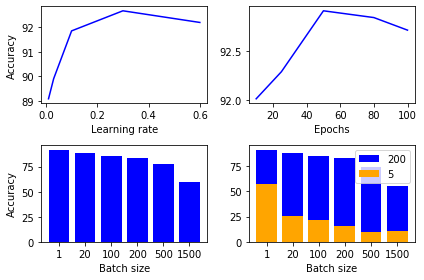

In [12]:
objects = bs_sizes
y_pos = np.arange(len(objects))
performance1 = model_results[0]
performance2 = model_results[1]
print(performance1) 
print(performance2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.plot(learning_rates, lr_acc, 'b')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Learning rate')

ax2.plot(epochs, epochs_acc, 'b')
ax2.set_xlabel('Epochs')

ax3.bar(np.arange(len(batch_sizes)), bs_acc, color='blue')
ax3.set_xticks(range(6))
ax3.set_xticklabels([1,20,100,200,500,1500])
ax3.set_ylabel('Accuracy')
ax3.set_xlabel('Batch size')

ax4.bar(np.arange(len(bs_sizes)), performance1, align='center', color='blue')
ax4.bar(y_pos, performance2, align='center', color='orange')
ax4.legend(hidden_nodes, loc=1)
ax4.set_xticks(range(6))
ax4.set_xticklabels([1,20,100,200,500,1500])
ax4.set_xlabel('Batch size')


fig.tight_layout()


#plt.savefig('ann-hp-vs-acc.png', dpi=300)
plt.show()